# Weeks 2 Exercises

Name: Kesav Adithya Venkidusamy <br>
Course: DSC550 - Data Mining <br>
Instructor: Brett Werner <br>

### Using a data set of your choice, write an introduction explaining the data set.

As part of this week's assignment, I have considered the historical data of Dogecoin downloaded from Kaggle website. Dogecoin is a cryptocurrency created by software engineers Billy Markus and Jackson Palmer, who decided to create a payment system as a "joke", making fun of the wild speculation in cryptocurrencies at the time. It is eight largest cryptocurrency by market cap.

The dataset contains the following fields. I have provided the description of each field along with the name.

1. Date - Trading Date
2. Open Price - Open price for the given day 
3. High Price - High price for the given day
4. Low Price - Low price for the given day
5. Close Price - Close price for the given day 
6. Volume - Volume trade for the given day


### Identify a question or question(s) that you would like to explore in your data set.

As part of this exercise, we are going to analyze if investing in Dogecoin is suitable for investors. If it is suitable, what kind of investors (conservative, moderate or aggressive) can invest in this cryptocurrency

### Data Wrangling

In [38]:
## Importing the libraries required for this assignment

import pandas as pd
import numpy as np

##### 1. Load the dataset as a Pandas data frame.

In [39]:
## Import the CSV file having dogecoing historical data downloaded from Kaggle website into a dataframe "doge_df"

doge_df = pd.read_csv("DOGE-USD.csv")

##### 2. Display the first ten rows of data.

In [40]:
## Using head command of dataframe to display the first 10 rows

doge_df.head(10)

,Date,Open,High,Low,Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270
5,2017-11-14,0.001201,0.001239,0.001131,0.001184,2660340
6,2017-11-15,0.001189,0.001351,0.001179,0.001339,2840180
7,2017-11-16,0.001348,0.001424,0.001286,0.001390,3423010
8,2017-11-17,0.001381,0.001394,0.001274,0.001313,2787480
9,2017-11-18,0.001308,0.001385,0.001254,0.001373,1648260


##### 3. Find the dimensions (number of rows and columns) in the data frame. What do these two numbers represent in the context of the data?

In [41]:
## Calculating the shape of the dataframe

print("The number of rows and columns present in dataframe: {}".format(doge_df.shape))

The number of rows and columns present in dataframe: (1532, 6)


The above 2 numbers represents the number of rows and columns present in the dataframe. In the above result, 1532 represents number of rows present in the dataframe and 6 represents the number of columns present in the dataframe.

##### 4. Describing the dataframe to display the stats of the dataset

In [42]:
## Describe function of dataframe will display the stats for the fields present in the dataframe

doge_df.describe()

,Open,High,Low,Close,Volume
count,1532.000000,1532.000000,1532.000000,1532.000000,1.532000e+03
mean,0.053032,0.056574,0.049593,0.053151,1.049954e+09
std,0.106257,0.114770,0.097944,0.106358,3.809881e+09
min,0.001046,0.001210,0.001002,0.001038,1.431720e+06
25%,0.002494,0.002551,0.002430,0.002495,1.965492e+07
50%,0.003161,0.003260,0.003059,0.003162,6.806869e+07
75%,0.009115,0.009615,0.008515,0.009195,2.837324e+08
max,0.687801,0.737567,0.608168,0.684777,6.941068e+10


##### 5. Converting the datatype of date field present in the dataframe

In [43]:
## Coverting the Trading date field to date datatype

doge_df['Date'] = pd.to_datetime(doge_df['Date'], format='%Y-%m-%d')

In [44]:
## Printing the datatypes for all the columns present in the dataframe

doge_df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

##### Step 6: Identify outliers and bad data

In [45]:
## First we will check if there are any null values present in any of the column which we have selected for the analysis

print("Number of Null values in Trading_date: {}".format(doge_df.Date.isnull().sum()))
print("Number of Null values in Open Price: {}".format(doge_df.Open.isnull().sum()))
print("Number of Null values in High Price: {}".format(doge_df.High.isnull().sum()))
print("Number of Null values in Low Price: {}".format(doge_df.Low.isnull().sum()))
print("Number of Null values in Close Price: {}".format(doge_df.Close.isnull().sum()))
print("Number of Null values in Volume: {}".format(doge_df.Volume.isnull().sum()))

Number of Null values in Trading_date: 0
Number of Null values in Open Price: 0
Number of Null values in High Price: 0
Number of Null values in Low Price: 0
Number of Null values in Close Price: 0
Number of Null values in Volume: 0


In [46]:
## Now we are going to see the min and max date for each cryptocurrency

result = doge_df.agg({'Date': ['min', 'max']})
result

,Date
min,2017-11-09
max,2022-01-18


##### Step 7: Adding additional fields required for visualization

In [47]:
## Using the existing fields, the below fields need to be added to the dataset which might be useful for analysis
## 1. Percentage increase or decrease for the day --> Calculated by close price - open price / open price
## 2. Month and year --> Derived by Trading date field present in the dataset
## 3. Percentage of Price fluctuation for the day --> Calculated by (high price - low price)/ low price

## As a first step, we will be adding Month_Year field to the dataframe

doge_df['Month_Year'] = pd.to_datetime(doge_df['Date']).dt.to_period('M')
doge_df.head()

,Date,Open,High,Low,Close,Volume,Month_Year
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,2017-11
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,2017-11
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,2017-11
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,2017-11
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,2017-11


In [48]:
## Adding percentage of price increase and decrease and  Percentage of Price fluctuation for the day fields to the dataframe

doge_df['price_percent_day'] = ((doge_df['Close'] - doge_df['Open']) / doge_df['Open']) * 100
doge_df['price_fluctuation_day'] = ((doge_df['High'] - doge_df['Low']) / doge_df['Low']) * 100

doge_df['price_percent_day'] = doge_df['price_percent_day'].apply(lambda x:round(x,2))
doge_df['price_fluctuation_day'] = doge_df['price_fluctuation_day'].apply(lambda x:round(x,2))

doge_df.head()

,Date,Open,High,Low,Close,Volume,Month_Year,price_percent_day,price_fluctuation_day
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,6259550,2017-11,17.23,19.81
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,4246520,2017-11,-18.16,27.20
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,2231080,2017-11,4.80,10.17
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,3288960,2017-11,-12.70,20.76
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,2481270,2017-11,15.77,18.94


### Create at least three graphs that help answer these questions. Make sure your graphs are clearly readable and are labeled appropriately and professionally.

##### Histogram Chart

In [49]:
import pylab as pl

Text(0.5, 0.98, 'Dogecoin Close Price Histogram')

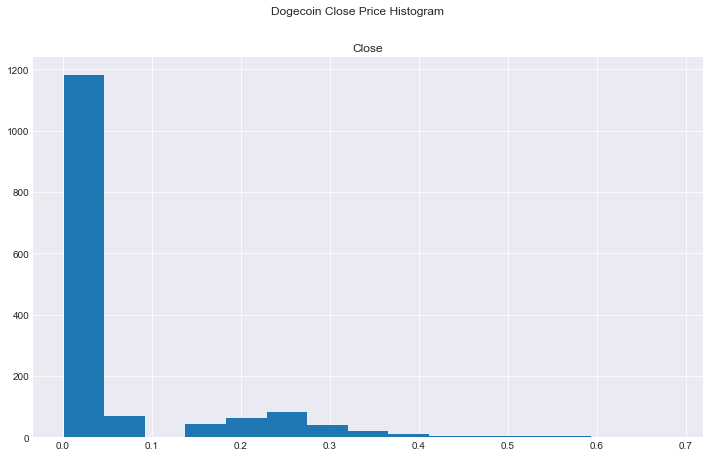

In [50]:
## Histograms and line chart to analyze the closing price for dogecoin
## Creating histograms for closing price for dogecoin

doge_df.hist(column='Close',figsize=[12,7], bins=15)
pl.suptitle("Dogecoin Close Price Histogram")

From the histogram created for closing price of Dogecoin shown above, we could clearly understand the chart is positively skewed.

##### Candlestick Chart

In [51]:
## Plotting candlestick charts for dogecoin
## To plot candlestick chart, we will use mplfinance library
## After installing mplfinance lib, candlestick_ohlc module needs to be imported

import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpdates

In [52]:
## Defining the style to be used for the plot

plt.style.use('seaborn-darkgrid')

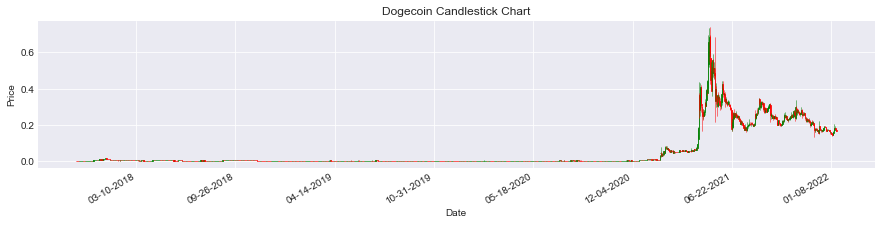

In [53]:
## Extracting the data for major cryptocurrencies given in the below link and create candlestick chart
# Extracting Data required for plotting

df = doge_df.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
df['Date'] = mpdates.date2num(df['Date'])
    
# creating Subplots
fig, ax = plt.subplots()

fig.set_figheight(3)
fig.set_figwidth(15)
 
# plotting the data
candlestick_ohlc(ax, df.values, width = 1,
                 colorup = 'green', colordown = 'red',
                 alpha = 0.8)
 
# allow grid
ax.grid(True)
 
# Setting labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
 
# setting title
plt.title('Dogecoin Candlestick Chart')
 
# Formatting Date
date_format = mpdates.DateFormatter('%m-%d-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
 
# show the plot
plt.show()

##### Bar Chart

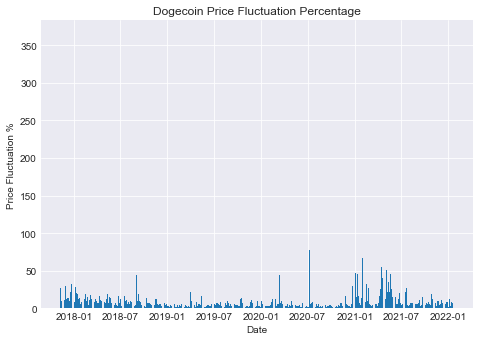

In [71]:
## Creating the bar chart for price fluctuation percentage for dogecoin

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(doge_df.Date, doge_df.price_fluctuation_day)

ax.set_xlabel('Date')
ax.set_ylabel('Price Fluctuation %')
ax.set_title('Dogecoin Price Fluctuation Percentage')

plt.show()

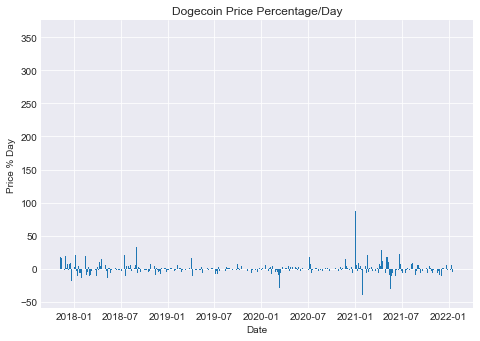

In [73]:
## Creating the bar chart for price percentage increase/decrease for dogecoin

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(doge_df.Date, doge_df.price_percent_day)

ax.set_xlabel('Date')
ax.set_ylabel('Price % Day')
ax.set_title('Dogecoin Price Percentage/Day')

plt.show()

##### Line charts

Text(0.5, 1.0, 'Dogecoin Price Fluctuation Percentage Chart')

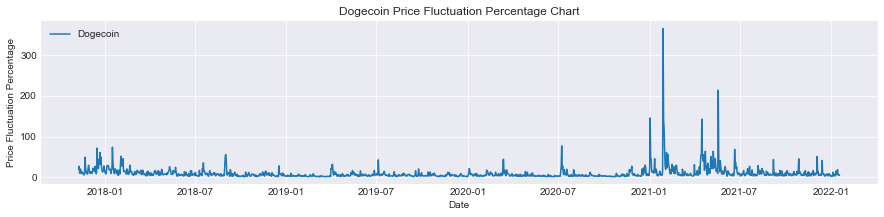

In [62]:
## Creating the line chart for price fluctuation percentage for dogecoin

import warnings
warnings.filterwarnings("ignore")
fig,ax = plt.subplots()

fig.set_figheight(3)
fig.set_figwidth(15)

ax.plot(doge_df.Date, doge_df.price_fluctuation_day, label='Dogecoin')

ax.set_xlabel("Date")
ax.set_ylabel("Price Fluctuation Percentage")
ax.legend(loc='upper left')

plt.title('Dogecoin Price Fluctuation Percentage Chart')

Text(0.5, 1.0, 'Dogecoin Price Percentage Day Chart')

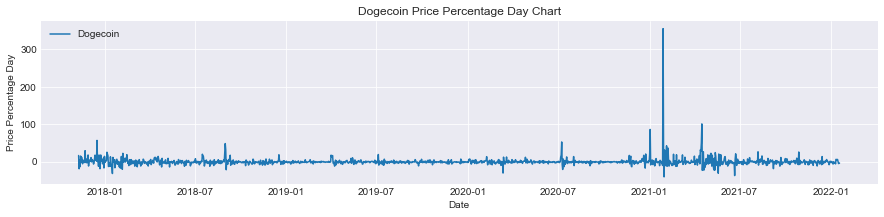

In [61]:
## Creating the line chart for price percentage for dogecoin
## Plot individual lines with custom colors, styles, and widths

import warnings
warnings.filterwarnings("ignore")
fig,ax = plt.subplots()

fig.set_figheight(3)
fig.set_figwidth(15)


ax.plot(doge_df.Date, doge_df.price_percent_day, label='Dogecoin')

ax.set_xlabel("Date")
ax.set_ylabel("Price Percentage Day")
ax.legend(loc='upper left')

plt.title('Dogecoin Price Percentage Day Chart')

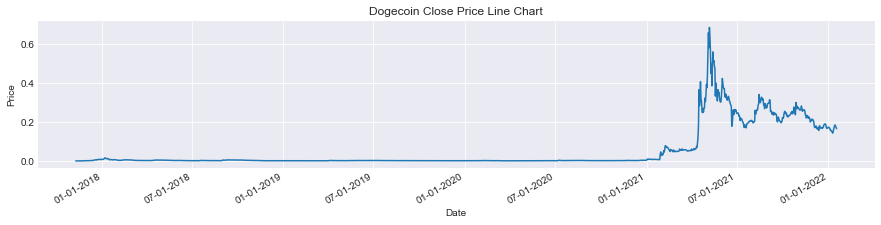

In [64]:
## Line chart for the closing price of dogecoin

df = doge_df.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
df['Date'] = mpdates.date2num(df['Date'])
    
# creating Subplots
fig, ax = plt.subplots()

fig.set_figheight(3)
fig.set_figwidth(15)

# allow grid
ax.grid(True)
 
# Setting labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
 
# setting title
plt.title('Dogecoin Close Price Line Chart')
 
# Formatting Date
date_format = mpdates.DateFormatter('%m-%d-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

plt.plot(doge_df.Date, doge_df.Close, label='Dogecoin')

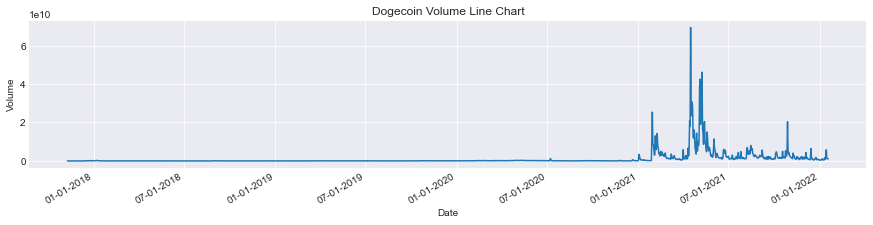

In [67]:
## Line chart for the volume price of dogecoin
# creating Subplots
fig, ax = plt.subplots()

fig.set_figheight(3)
fig.set_figwidth(15)

# allow grid
ax.grid(True)
 
# Setting labels
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
 
# setting title
plt.title('Dogecoin Volume Line Chart')
 
# Formatting Date
date_format = mpdates.DateFormatter('%m-%d-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

plt.plot(doge_df.Date, doge_df.Volume, label='Dogecoin')

### Explain what you have learned from each of your graphs.

Histogram:<br>
From histogram created based on closing price of each day, we see see the chart is postively skewed. Positive skew refers to a longer or fatter tail on the right. The mean is greater than the median as the data is more towards the lower side and the mean average of all the values, whereas the median is the middle value of the data. So, if the data is more bent towards the lower side, the average will be more than the middle value.

Candle Stick Chart:<br>
Candlestick charts are used by traders to determine possible price movement based on past patterns. Candlesticks are useful when trading as they show four price points (open, close, high, and low) throughout the period of time the trader specifies. From the chart, I see the candles after April Month of 2020 are long enough which depicts the price fluctuation is very high which is unsuitable for conservative and moderate investors.

Bar Graph:<br>
From the given dataset, I calculated increase/decrease in price percentage and price fluctuation percentage for a day using below formaula and used these field to plot bar charts.

price percentage/day = (Close Price/ Open Price) * (Open Price) * 100 <br>
price fluctuation/day = (High Price/ Low Price) * (Low Price) * 100

From the chart, it is clearly understood that both price percentage and price fluctuation percentage varies a lot. For couple of days, the price has increased more than 100% on both positive and negative sides which makes unsuitable for conservative and moderate investors. Even the aggressive investors who wants to loose all their money can only invest in Dogecoin.

Line Chart:<br>
Finally, I tried to plot line charts for closing price and volume for each day. From the chart, I see the closing price of this cryptocurrency was around 0 till 2020. At the same time, the trading volumn for this cryptocurrency is also very less till 2020. Starting 2021, the closing price and volume started going exponentially which makes unsuitable for investors. The investors who bought this cryptocurrency in the mid of 2021 where the price was very high suffered a huge loss.

### Write a conclusion that summarizes your findings.

Based on the analysis and the charts that I plotted, I conclude that investing in dogecoin is <b>Speculative investment</b>. The price fluctuation and increase/decrease make this cryptocurrency <b>unsuitable for conservative and moderate investors</b>. As mentioned earlier, the aggressive investors should also calculate their risk tolerance before investing in this cryptocurrency. The people should invest in this cryptocurrency which they want to <b>lose everything</b>. There may be a chance that it could continue to grow, but it’s a risky chance to take. So, Investing in dogecoin is not a good idea and might not be good investment for investors.